In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from FEM_Solver import FEM_Helmholtz

%load_ext autoreload
%autoreload 2
plt.rcParams["figure.autolayout"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Computing the solutions

### Discretizations and frequencies

In [8]:
N_set = np.concatenate((
    np.linspace(1e01, 1e02, 6, endpoint=False, dtype=int),
    np.linspace(1e02, 1e03, 9, endpoint=False, dtype=int),
    np.linspace(1e03, 1e04, 10, endpoint=True, dtype=int),
    ))

k_set = np.linspace(0, 200, 9)[1:] * np.pi / 2

In [9]:
# N_set = np.linspace(2, 100, 25, endpoint=False, dtype=int)
# k_set = np.linspace(0, 8, 9)[1:] * np.pi / 2

### Parameters, exact and numerical solutions

In [ ]:
# Parameters
f = lambda x: 0  # Source function
a, b = -1, +1  # Domain

errors = []
for k in k_set:
    errors_k = []

    # Exact solution and its derivative
    alpha, beta = 10 / np.pi, 5 / np.pi
    u = lambda x: alpha * np.cos(k * x) + 1j * beta * np.sin(k * x)
    u_x = lambda x: -alpha * k * np.sin(k * x) + 1j * beta * k * np.cos(k * x)

    # Boundary conditions
    ga = u_x(a) + 1j * k * u(a)
    gb = u_x(b) - 1j * k * u(b)

    # Numerical solutions
    for N in N_set:
        print('Solving for'
            + f' k = {round(k / (np.pi / 2))}π/2,'.ljust(12)
            + f' N = {N}'.ljust(12)
            + ' in progress...')

        solver = FEM_Helmholtz(f=f, k=k, a=a, b=b, ga=ga, gb=gb, N=N, N_quad=100)
        solver.solve()
        r = solver.sol
        r_x = solver.der

        errors_k.append(solver.H1_error(u, u_x))

    errors.append(errors_k)

## Plotting the rate of convergence

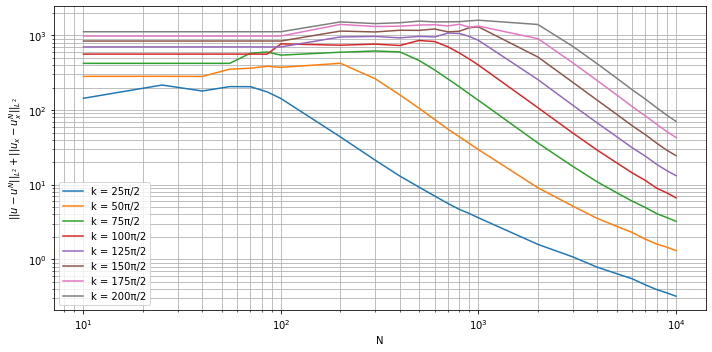

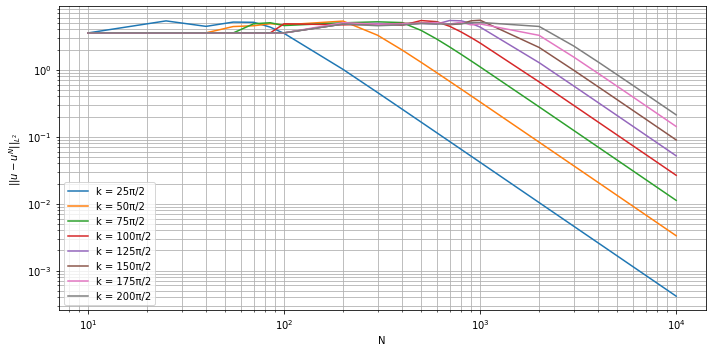

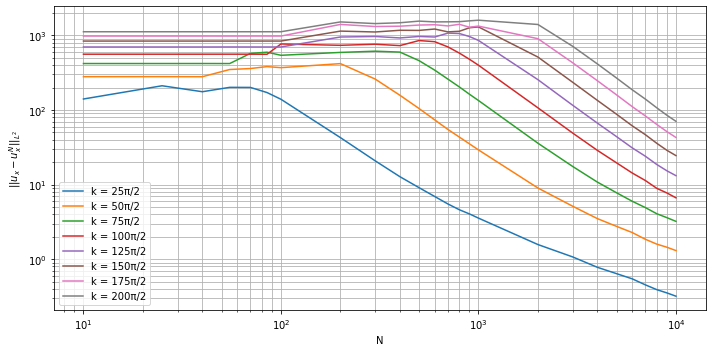

In [11]:
plt.rcParams['figure.figsize'] = [10, 5]

# H1 error
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)
for idx, k in enumerate(k_set):
    axs.plot(N_set, [error[0] for error in errors[idx]], label=f'k = {round(k / (np.pi / 2))}π/2')
axs.set(xscale='log', yscale='log', xlabel='N', ylabel='$||u - u^N||_{L^2} + ||u_x - u^N_x||_{L^2}$')
axs.grid(which='both')
axs.legend()

# L2 norm of u error
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)
for idx, k in enumerate(k_set):
    axs.plot(N_set, [error[1] for error in errors[idx]], label=f'k = {round(k / (np.pi / 2))}π/2')
axs.set(xscale='log', yscale='log', xlabel='N', ylabel='$||u - u^N||_{L^2}$')
axs.grid(which='both')
axs.legend()

# L2 norm of u_x
fig, axs = plt.subplots()
fig.tight_layout(pad=3.0)
for idx, k in enumerate(k_set):
    axs.plot(N_set, [error[2] for error in errors[idx]], label=f'k = {round(k / (np.pi / 2))}π/2')
axs.set(xscale='log', yscale='log', xlabel='N', ylabel='$||u_x - u^N_x||_{L^2}$')
axs.grid(which='both')
axs.legend()
